# House price prediction

# Goal of the Project

To predict the price of the house by its feature in this project if I want to buy or sell of the house but I don't know the exact price of the house so supervised machine learning regration algorithm can help us to predict the price of the house just providing feature of the target house

In [1]:
import pandas as pd

# Data Preprocessing

load the data

In [2]:
housing = pd.read_csv("data.csv")

In [3]:
housing.head()   # display first five rows of dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [4]:
housing.tail()  #display last five rows of dataset using .tail() function

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,7.88,11.9


# Discription about dataset

Number of data columns- 13

Number of rows- 506

There are 13 attributes in each case of the dataset. They are:

1)  CRIM - per capita crime rate by town

2)  ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

3)  INDUS - proportion of non-retail business acres per town.

4)  CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

5)  NOX - nitric oxides concentration (parts per 10 million)

6)  RM - average number of rooms per house

7)  AGE - proportion of owner-occupied units built prior to 1940

8)  DIS - weighted distances to five employment centres

9)  RAD - index of accessibility to radial highways

10) TAX - full-value property-tax rate per $10,000

11) PTRATIO - pupil-teacher ratio by town

12) LSTAT - % lower status of the population

13) MEDV - Median value of owner-occupied homes in $1000’s '''(price of home)

In [5]:
housing.info()    #litilebit information about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


In [6]:
housing.shape   # using this function we can see how many col and rows in overall dataset

(506, 13)

In [7]:
housing['CHAS'].value_counts()   # varify the crime rate by town

0    471
1     35
Name: CHAS, dtype: int64

In [8]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [9]:
%matplotlib inline

Text(0.5, 1.0, 'House_Dataset')

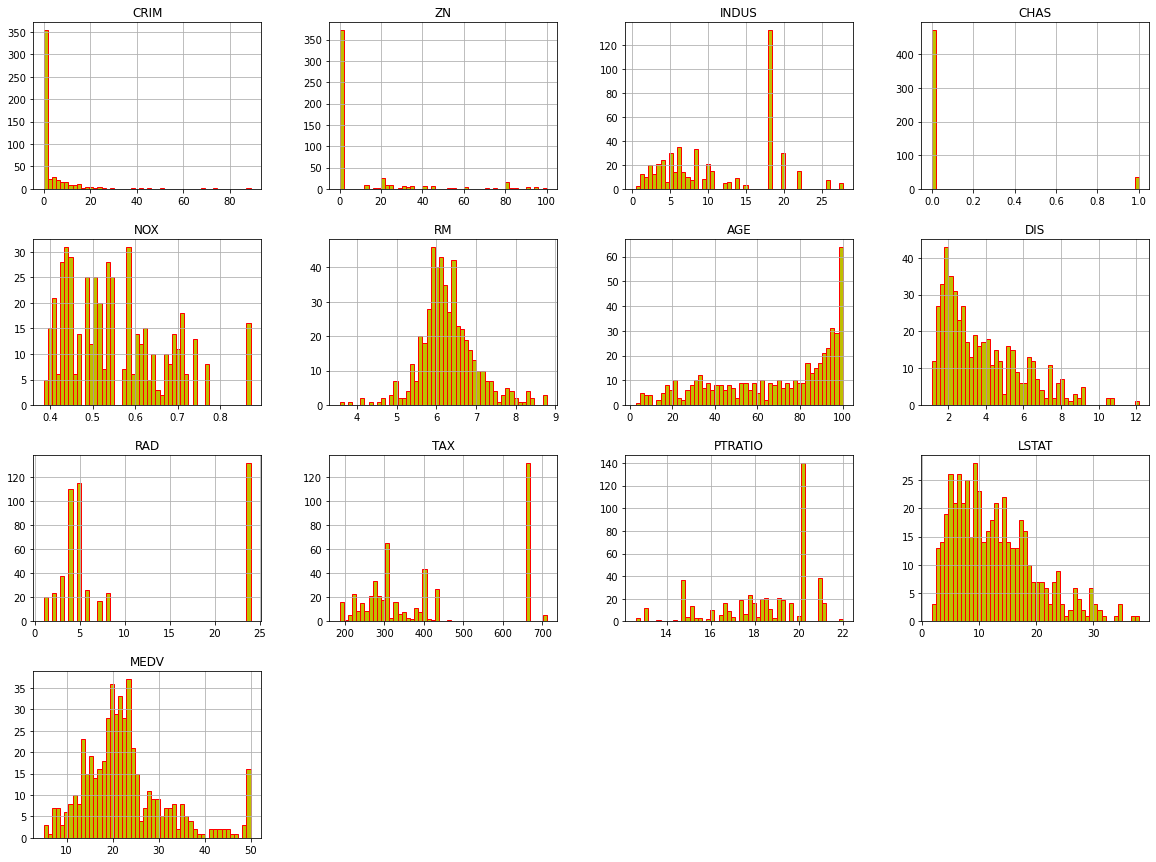

In [10]:
# For plotting histogram
import matplotlib.pyplot as plt
housing.hist(bins=50, ec="r",histtype='bar',figsize=(20, 15),color="y")
plt.title("House_Dataset")

## Train-Test Splitting

In [11]:
import numpy as np
from sklearn.model_selection import train_test_split
train, test  = train_test_split(housing, test_size=0.3, random_state=42)
print(f"Rows in train set: {len(train)}\nRows in test set: {len(test)}\n")

Rows in train set: 354
Rows in test set: 152



In [12]:
from sklearn.model_selection import StratifiedShuffleSplit     # for same value in train and test set 
split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    train_set = housing.loc[train_index]  #display index like 0 1 2 3 4 
    test_set = housing.loc[test_index]

In [13]:
test_set['CHAS'].value_counts()

0    141
1     11
Name: CHAS, dtype: int64

In [14]:
train_set['CHAS'].value_counts()

0    330
1     24
Name: CHAS, dtype: int64

In [15]:
95/7

13.571428571428571

In [16]:
376/28

13.428571428571429

In [17]:
house = train_set.copy()  # new df in this df i was copy tran_set into house df

## Looking for Correlations

In [18]:
corr_matrix = house.corr()    # correlation between two variable
corr_matrix['MEDV'].sort_values(ascending=False)   

MEDV       1.000000
RM         0.679153
ZN         0.375873
DIS        0.267162
CHAS       0.216682
AGE       -0.380330
RAD       -0.392128
CRIM      -0.398049
NOX       -0.425741
TAX       -0.478108
INDUS     -0.496780
PTRATIO   -0.511760
LSTAT     -0.734966
Name: MEDV, dtype: float64

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

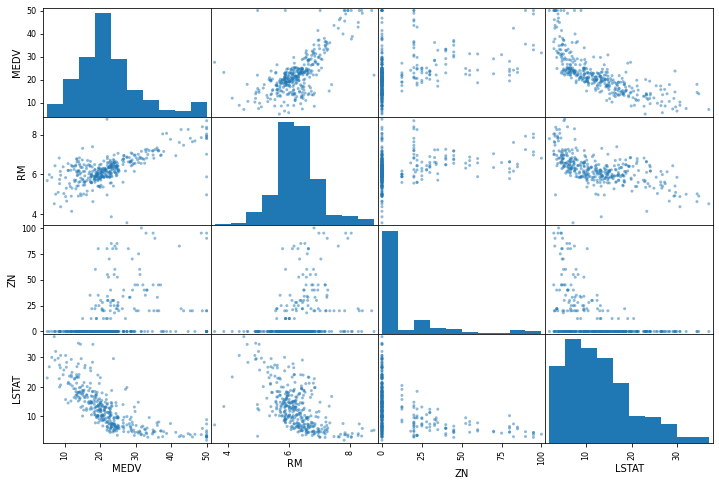

In [19]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV", "RM", "ZN", "LSTAT"]
scatter_matrix(house[attributes], figsize = (12,8))

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

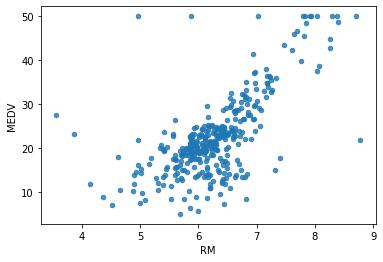

In [20]:
house.plot(kind="scatter", x="RM", y="MEDV", alpha=0.8)

## Create new attribute 


In [21]:
house["TAXRM"] = house['TAX']/house['RM']    # attribute for better prediction or just for a learning purpose

In [22]:
house.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,TAXRM
301,0.03537,34.0,6.09,0,0.433,6.590,40.4,5.4917,7,329,16.1,9.50,22.0,49.924127
309,0.34940,0.0,9.90,0,0.544,5.972,76.7,3.1025,4,304,18.4,9.97,20.3,50.904220
337,0.03041,0.0,5.19,0,0.515,5.895,59.6,5.6150,5,224,20.2,10.56,18.5,37.998304
74,0.07896,0.0,12.83,0,0.437,6.273,6.0,4.2515,5,398,18.7,6.78,24.1,63.446517
429,9.33889,0.0,18.10,0,0.679,6.380,95.6,1.9682,24,666,20.2,24.08,9.5,104.388715


In [23]:
corr_matrix = house.corr()                  # correlation of after created attribute 
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.679153
ZN         0.375873
DIS        0.267162
CHAS       0.216682
AGE       -0.380330
RAD       -0.392128
CRIM      -0.398049
NOX       -0.425741
TAX       -0.478108
INDUS     -0.496780
PTRATIO   -0.511760
TAXRM     -0.545574
LSTAT     -0.734966
Name: MEDV, dtype: float64

<AxesSubplot:xlabel='TAXRM', ylabel='MEDV'>

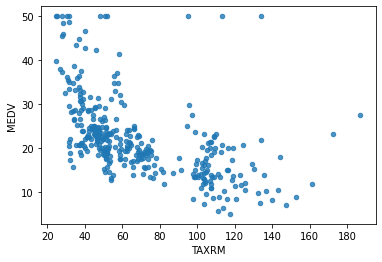

In [24]:
house.plot(kind="scatter", x="TAXRM", y="MEDV", alpha=0.8)

In [25]:
house = train_set.drop("MEDV", axis=1)   #I did seprate the lables(MEDV) from train set   (house is new df)  
house_labels = train_set["MEDV"].copy()   # and copy this housing_lables for prediction

## Missing Attributes

In [26]:
# To take care of missing attributes, we have three options:
#     1. Get remove of the missing data points
#     2. Get remove of the whole attribute
#     3. Set the value to some value(0, mean or median)

<AxesSubplot:>

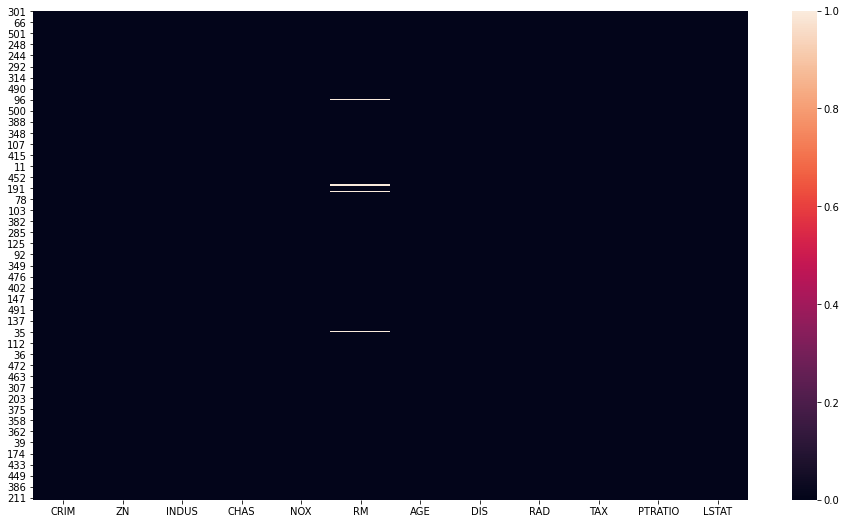

In [27]:
import seaborn as sns          # show the number of missing data
plt.figure(figsize=(16,9))       # this is a tranning set
sns.heatmap(house.isnull())

In [28]:
house.info() # before we started filling missing attributes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354 entries, 301 to 455
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     354 non-null    float64
 1   ZN       354 non-null    float64
 2   INDUS    354 non-null    float64
 3   CHAS     354 non-null    int64  
 4   NOX      354 non-null    float64
 5   RM       350 non-null    float64
 6   AGE      354 non-null    float64
 7   DIS      354 non-null    float64
 8   RAD      354 non-null    int64  
 9   TAX      354 non-null    int64  
 10  PTRATIO  354 non-null    float64
 11  LSTAT    354 non-null    float64
dtypes: float64(9), int64(3)
memory usage: 36.0 KB


In [29]:
from sklearn.impute import SimpleImputer    # find median value 
imputer = SimpleImputer(strategy="median")
imputer.fit(house)

SimpleImputer(strategy='median')

In [30]:
house.shape     #looking shapen of tranning set

(354, 12)

In [31]:
imputer.statistics_    # numpy array

array([2.6888e-01, 0.0000e+00, 9.9000e+00, 0.0000e+00, 5.3800e-01,
       6.2150e+00, 7.7950e+01, 3.0401e+00, 5.0000e+00, 3.4650e+02,
       1.8900e+01, 1.1650e+01])

In [32]:
X = imputer.transform(house)

In [33]:
housing_tr = pd.DataFrame(X, columns=house.columns)

In [34]:
housing_tr.describe()    #Now I am looking the dis about new created data frame

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
count,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000
mean,3.630612,11.026836,11.361582,0.067797,0.559219,6.267822,68.565819,3.691179,9.593220,412.209040,18.401977,12.734633
std,8.366787,22.270612,6.904776,0.251752,0.118326,0.725372,28.673784,2.041348,8.712178,167.985772,2.157488,7.177097
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,188.000000,13.000000,1.920000
25%,0.085013,0.000000,5.190000,0.000000,0.450000,5.875750,43.650000,2.042000,4.000000,281.750000,17.075000,6.802500
50%,0.268880,0.000000,9.900000,0.000000,0.538000,6.215000,77.950000,3.040100,5.000000,346.500000,18.900000,11.650000
75%,3.689387,12.500000,18.100000,0.000000,0.631000,6.623500,94.100000,4.941025,24.000000,666.000000,20.200000,16.930000
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,10.710300,24.000000,711.000000,21.200000,36.980000


## Scikit-learn Design

 three types of objects
1. Estimators - It estimates some parameter based on a dataset. Eg. imputer. It has a fit method and transform method. Fit method - Fits the dataset and calculates internal parameters

2. Transformers - transform method takes input and returns output based on the learnings from fit(). It also has a convenience function called fit_transform() which fits and then transforms.

3. Predictors - LinearRegression model is an example of predictor. fit() and predict() are two common functions. It also gives score() function which will evaluate the predictions.

## Feature Scaling

two types of feature scaling methods:
1. Min-max scaling (Normalization)
    (value - min)/(max - min)
    Sklearn provides a class called MinMaxScaler for this using this values in one scale 
    
2. Standardization
    (value - mean)/std
    Sklearn provides a class called StandardScaler for this


## Creating a Pipeline

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])


In [36]:
housing_num_tr = my_pipeline.fit_transform(housing_tr)    

In [37]:
housing_num_tr.shape

(354, 12)

## Selecting a desired model 

In [38]:
from sklearn.ensemble import RandomForestRegressor  
model = RandomForestRegressor()
model.fit(housing_num_tr, house_labels)

RandomForestRegressor()

In [39]:
some_data = housing_tr.iloc[:5]  # display first 5 row

In [40]:
some_labels = house_labels.iloc[:5]

In [41]:
prepared_data = my_pipeline.transform(some_data)

In [42]:
model.predict(prepared_data)    #this is the prediction

array([23.388, 20.581, 19.542, 24.005, 10.161])

In [43]:
list(some_labels)   # and this is the orignal price (MEDV)

[22.0, 20.3, 18.5, 24.1, 9.5]

## Evaluating the model

In [44]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(house_labels, housing_predictions)
rmse = np.sqrt(mse)  # np.sqrt() is function to find root mean squre root

In [45]:
print("MSE :",mse)
print("RMSE :",rmse)


MSE : 2.0182603079096024
RMSE : 1.4206548869833244


## Using better evaluation technique - Cross Validation

In [46]:
# 1 2 3 4 5 6 7 8 9 10
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, house_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)   

In [47]:
rmse_scores 

array([3.67670748, 2.70613566, 2.72625749, 4.57579913, 2.8747712 ,
       4.25646402, 3.28484475, 3.21227812, 3.40039108, 5.39169907])

In [48]:
def print_scores(scores):
    print("Scores:", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

In [49]:
print_scores(rmse_scores)

Scores: [3.67670748 2.70613566 2.72625749 4.57579913 2.8747712  4.25646402
 3.28484475 3.21227812 3.40039108 5.39169907]
Mean:  3.610534799909879
Standard deviation:  0.8352221139266562


# Save the Model

In [50]:
from joblib import dump, load     # save the overall model using joblib libraies
dump(model, 'House.joblib') 

['House.joblib']

# Testing the model on test dataset

In [51]:
X_test = test_set.drop("MEDV", axis=1)                      #  features
Y_test = test_set["MEDV"].copy()                               # labels
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
#print(final_predictions, list(Y_test))

In [52]:
final_rmse

3.1150321912673027

In [53]:
prepared_data[0]      # features 

array([-0.43031222,  1.03300622, -0.76454953, -0.26967994, -1.06821718,
        0.44478445, -0.98367505,  0.88327391, -0.29807595, -0.49603496,
       -1.06848125, -0.4513261 ])

## Using the model

In [54]:
from joblib import dump, load
import numpy as np
model = load('House.joblib')

# this is the features
features = np.array([[-5.43942006, 4.12628155, -1.6165014, -0.67288841, -1.42262747,
       -11.44443979304, -49.31238772,  7.61111401, -26.0016879 , -0.5778192 ,
       -0.97491834,  -66.86091034]])
model.predict(features)

array([25.131])